# 1. Import
## 1.1. Librairies

In [72]:
import scanpy as sc
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

## 1.2. Data

In [91]:
poon_data = sc.read_h5ad("/Users/scarcy/Projects/HumanThymusProject/data/raw_data/human_data/poon-farber/BarrierImmunity_Cleaned.h5ad")
print(poon_data)

AnnData object with n_obs × n_vars = 54725 × 60725
    obs: 'donor', 'tissue', 'total_counts', 'n_genes_by_counts', 'percent_mito', 'leiden', 'clust'
    var: 'Accession', 'Gene'
    uns: 'ff_save_history'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


First glance at the data

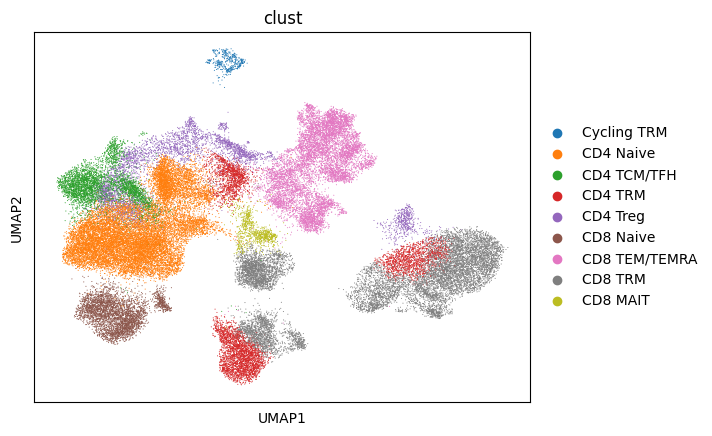

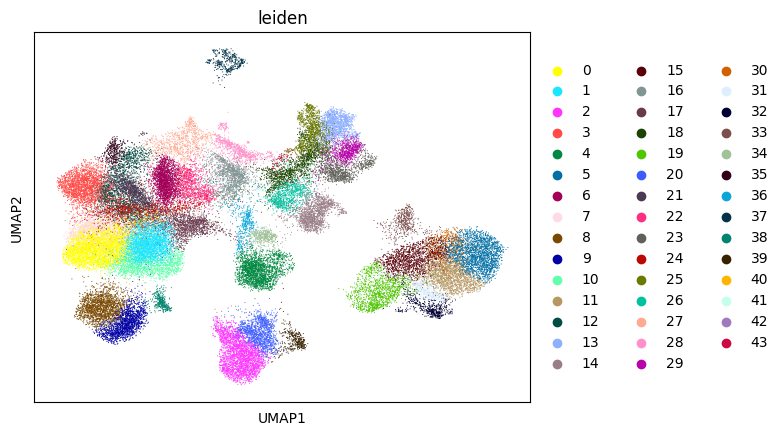

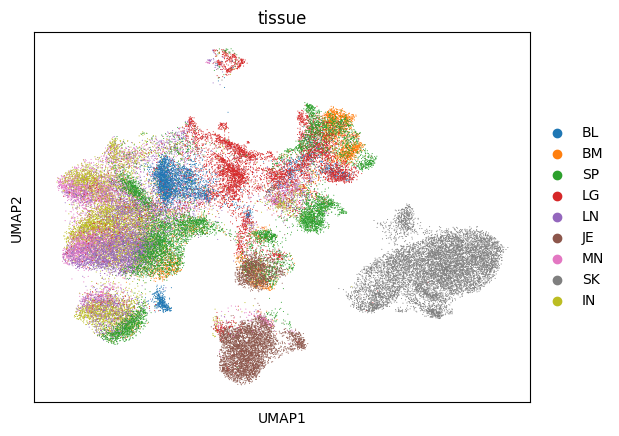

In [92]:
plt.style.use('default')
sc.pl.umap(poon_data, color="clust")
sc.pl.umap(poon_data, color="leiden")
sc.pl.umap(poon_data, color="tissue")

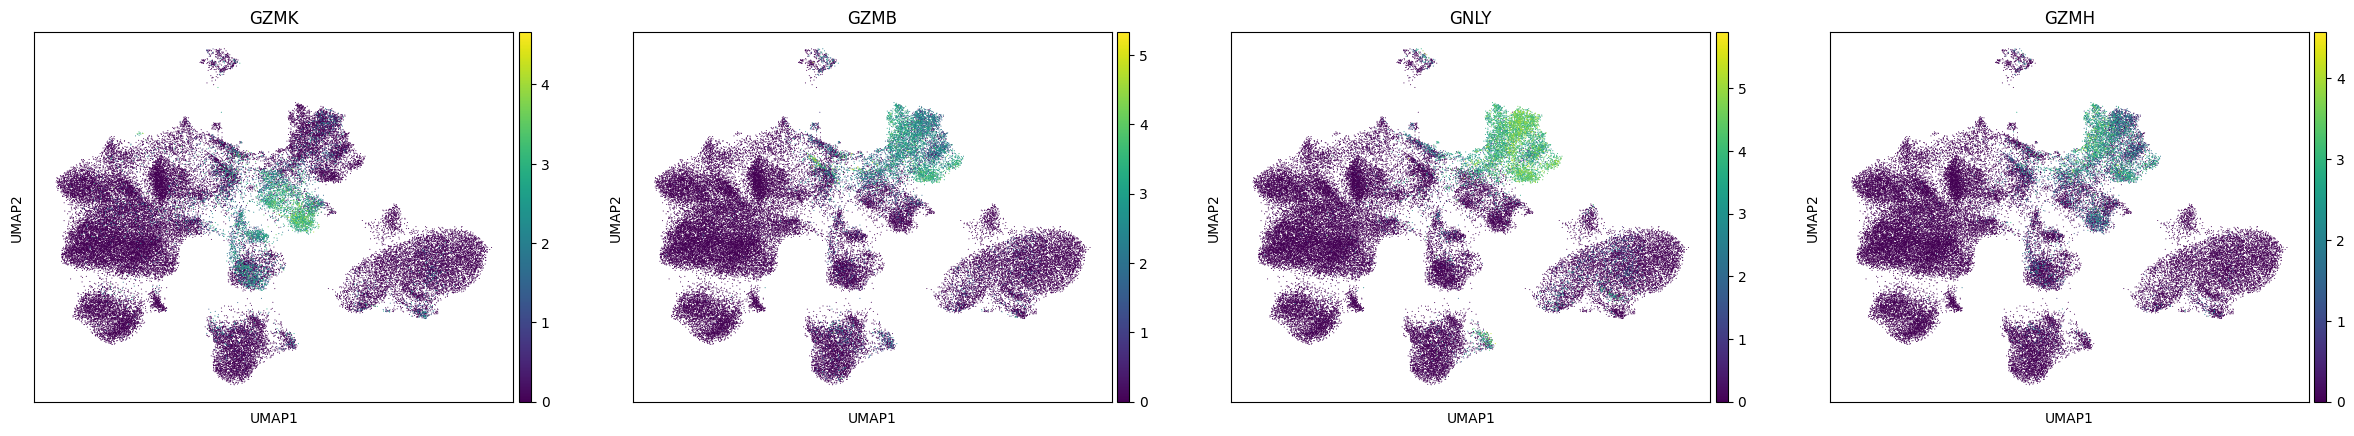

In [152]:
sc.pl.umap(poon_data, color=["GZMK", "GZMB", "GNLY", "GZMH"])

In [153]:
poon_data.obs
#poon_data.X[0:20,0:20].todense()

donor tissue  total_counts  n_genes_by_counts  \
cell_barcode                                                            
AAACCTGAGTATGACA_D492-0  D492     BM        8603.0               2286   
AAACCTGGTAGTGAAT_D492-0  D492     BM        4378.0               1386   
AAACCTGGTATCAGTC_D492-0  D492     BM        7411.0               2367   
AAACCTGGTCTCTCTG_D492-0  D492     BM        6481.0               2037   
AAACCTGGTTAAGAAC_D492-0  D492     BM        7497.0               2214   
...                       ...    ...           ...                ...   
TTTGTCACAGGCAGTA_D511-1  D511     SP        5323.0               1580   
TTTGTCACAGTAAGAT_D511-1  D511     SP        4148.0               1310   
TTTGTCACATTCTTAC_D511-1  D511     SP        7298.0               2005   
TTTGTCAGTACAAGTA_D511-1  D511     SP       16228.0               3432   
TTTGTCAGTTATCACG_D511-1  D511     SP        3861.0               1260   

                         percent_mito leiden      clust      GEP1      GEP4  \
cell_barcode                                                                  
AAACCTGAGTATGACA_D492-0      0.094618      4    CD8 TRM  0.179523 -0.030967   
AAACCTGGTAGTGAAT_D492-0      0.063271      4    CD8 TRM  0.190491  0.001643   
AAACCTGGTATCAGTC_D492-0      0.068547     34   CD8 MAIT  0.235725  0.105808   
AAACCTGGTCTCTCTG_D492-0      0.051844     17  CD4 Naive  0.067037 -0.038743   
AAACCTGGTTAAGAAC_D492-0      0.053621      4    CD8 TRM  0.137763  0.015628   
...                               ...    ...        ...       ...       ...   
TTTGTCACAGGCAGTA_D511-1      0.039451      9  CD8 Naive  0.009170 -0.039655   
TTTGTCACAGTAAGAT_D511-1      0.030858      1  CD4 Naive  0.004715 -0.029566   
TTTGTCACATTCTTAC_D511-1      0.042066     10  CD4 Naive  0.007163 -0.056842   
TTTGTCAGTACAAGTA_D511-1      0.041841     17  CD4 Naive  0.042321 -0.065068   
TTTGTCAGTTATCACG_D511-1      0.051541     17  CD4 Naive -0.031832 -0.035204   

                             GEP5      GEP6  
cell_barcode                                 
AAACCTGAGTATGACA_D492-0  0.158120  0.097182  
AAACCTGGTAGTGAAT_D492-0  0.145753  0.066251  
AAACCTGGTATCAGTC_D492-0  0.132331  0.073723  
AAACCTGGTCTCTCTG_D492-0  0.222410  0.188601  
AAACCTGGTTAAGAAC_D492-0  0.157921  0.046688  
...                           ...       ...  
TTTGTCACAGGCAGTA_D511-1  0.338323  0.054056  
TTTGTCACAGTAAGAT_D511-1  0.352407  0.083181  
TTTGTCACATTCTTAC_D511-1  0.359234  0.137621  
TTTGTCAGTACAAGTA_D511-1  0.360119  0.133925  
TTTGTCAGTTATCACG_D511-1  0.187327  0.089133  

[54725 rows x 11 columns]

# 2. Score Laurent's GEPs
## 2.1. Prepare data

In [94]:
gep_topgenes = pd.read_csv("/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnParkData/genes_per_GEP_df_2023-04-07.csv", index_col=0)
gep_topgenes
gep_topgenes.loc[:,"GEP_1"].dropna().tolist()

['PRR5',
 'LTK',
 'ITCH',
 'PLXND1',
 'SPCS3',
 'SLC4A10',
 'NCR3',
 'FLT4',
 'IL17RE',
 'SCART1',
 'B3GNT8',
 'FHL3',
 'SCN1B',
 'NR1D1',
 'TMEM91',
 'GFPT2',
 'CYP2E1',
 'LINGO4',
 'RORC',
 'IL4I1',
 'CCR1',
 'COL5A3',
 'LPCAT4',
 'SSR3',
 'CTSA',
 'SPTY2D1',
 'COLQ',
 'CLINT1',
 'ARHGAP10',
 'ME1',
 'GTF3C1',
 'RBM24',
 'ADAM12',
 'ROR2',
 'TNFSF14',
 'FKBP11',
 'EAF1',
 'CXXC5',
 'TMEM171',
 'GZMK',
 'CYP4F22',
 'WHRN',
 'NCS1',
 'CCR2',
 'ATF7IP2',
 'TANC2',
 'PLPP2',
 'ERN1',
 'P2RY14',
 'KLRB1',
 'PLCB1',
 'USP13',
 'CFH',
 'ODF2L',
 'CEBPD',
 'MATK',
 'S100A9',
 'FAM50A',
 'TPBG',
 'JAML',
 'IL18R1',
 'NEO1',
 'AC010175.1',
 'TRIQK',
 'CISD3',
 'AC092376.2',
 'GLRX',
 'P3H3',
 'CRAT',
 'CANX',
 'LGALS3',
 'UFM1',
 'IL23R',
 'PLXDC2',
 'ELOVL6',
 'CCR6',
 'HM13',
 'Z93930.2',
 'CCR5',
 'BCL7C',
 'SPIDR',
 'KIF5C',
 'PRSS35',
 'SLK',
 'B3GALT2',
 'ZNF541',
 'PHACTR2',
 'LATS2',
 'EFCAB14',
 'DAB1',
 'SPTSSB',
 'FAM43A',
 'DPP4',
 'ALOX5AP',
 'SETD7',
 'FAM57A',
 'GPR65',
 'PLD1',

In [224]:
poon_effector = pd.read_csv("/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_effector_signatures.csv", index_col=0)

# Keep only genes significantly DE and with positive log2FC
poon_eff1 = poon_effector.iloc[:,0:3]
poon_eff1 = poon_eff1.loc[(poon_eff1["Effector 1_pvals_adj"] < 0.05) & (poon_eff1["Effector 1_logfoldchanges"]>0)]

poon_eff2 = poon_effector.iloc[:,3:6]
poon_eff2 = poon_eff2.loc[(poon_eff2["Effector 2_pvals_adj"] < 0.05) & (poon_eff2["Effector 2_logfoldchanges"]>0)]

In [95]:
# Normalize & scale
sc.pp.normalize_total(poon_data, target_sum=1e4)
sc.pp.log1p(poon_data)
poon_data.raw = poon_data # not sure what this does
sc.pp.scale(poon_data, max_value=10, zero_center=True)

## 2.2. Check nb of genes from Poon data present in GEP lists

In [206]:
# Function to count elements present in array 1 vs array 2
def count_genes(gep, gep_top_genes=200, poon_genes=poon_data.var_names):
    gep_genes = gep_topgenes.loc[:,gep].dropna().tolist()[0:gep_top_genes]
    nbgenes_present = set(gep_genes) & set(poon_genes)
    nbgenes_absent  = set(gep_genes) - set(poon_genes)
    # Print
    print("Nb of GEP genes:", len(set(gep_genes)))
    print("Nb of GEP genes present in Poon data:", len(nbgenes_present))
    print("Nb of GEP genes absent from Poon data:", len(nbgenes_absent))

# Check for GEPs of interest
print("GEP1")
count_genes(gep="GEP_1")
print("GEP4")
count_genes(gep="GEP_4")
print("GEP5")
count_genes(gep="GEP_5")
print("GEP6")
count_genes(gep="GEP_6")

GEP1
Nb of GEP genes: 200
Nb of GEP genes present in Poon data: 184
Nb of GEP genes absent from Poon data: 16
GEP4
Nb of GEP genes: 200
Nb of GEP genes present in Poon data: 178
Nb of GEP genes absent from Poon data: 22
GEP5
Nb of GEP genes: 200
Nb of GEP genes present in Poon data: 165
Nb of GEP genes absent from Poon data: 35
GEP6
Nb of GEP genes: 200
Nb of GEP genes present in Poon data: 172
Nb of GEP genes absent from Poon data: 28


## 2.3. Compute gene scores

In [233]:
# Laurent's GEPs
sc.tl.score_genes(poon_data, gene_list=gep_topgenes.loc[:,"GEP_1"].dropna().tolist()[0:200], score_name="GEP1")
sc.tl.score_genes(poon_data, gene_list=gep_topgenes.loc[:,"GEP_4"].dropna().tolist()[0:200], score_name="GEP4")
sc.tl.score_genes(poon_data, gene_list=gep_topgenes.loc[:,"GEP_5"].dropna().tolist()[0:200], score_name="GEP5")
sc.tl.score_genes(poon_data, gene_list=gep_topgenes.loc[:,"GEP_6"].dropna().tolist()[0:200], score_name="GEP6")

# # Paper effector 1/2 signatures
sc.tl.score_genes(poon_data, gene_list=poon_eff1.loc[:,"Effector 1_names"].dropna().tolist()[0:200], score_name="Effector1")
sc.tl.score_genes(poon_data, gene_list=poon_eff2.loc[:,"Effector 2_names"].dropna().tolist()[0:200], score_name="Effector2")

/Users/scarcy/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [231]:
poon_data.obs

donor tissue  total_counts  n_genes_by_counts  \
cell_barcode                                                            
AAACCTGAGTATGACA_D492-0  D492     BM        8603.0               2286   
AAACCTGGTAGTGAAT_D492-0  D492     BM        4378.0               1386   
AAACCTGGTATCAGTC_D492-0  D492     BM        7411.0               2367   
AAACCTGGTCTCTCTG_D492-0  D492     BM        6481.0               2037   
AAACCTGGTTAAGAAC_D492-0  D492     BM        7497.0               2214   
...                       ...    ...           ...                ...   
TTTGTCACAGGCAGTA_D511-1  D511     SP        5323.0               1580   
TTTGTCACAGTAAGAT_D511-1  D511     SP        4148.0               1310   
TTTGTCACATTCTTAC_D511-1  D511     SP        7298.0               2005   
TTTGTCAGTACAAGTA_D511-1  D511     SP       16228.0               3432   
TTTGTCAGTTATCACG_D511-1  D511     SP        3861.0               1260   

                         percent_mito leiden      clust      GEP1      GEP4  \
cell_barcode                                                                  
AAACCTGAGTATGACA_D492-0      0.094618      4    CD8 TRM  0.177985 -0.031380   
AAACCTGGTAGTGAAT_D492-0      0.063271      4    CD8 TRM  0.189005  0.001055   
AAACCTGGTATCAGTC_D492-0      0.068547     34   CD8 MAIT  0.234086  0.104928   
AAACCTGGTCTCTCTG_D492-0      0.051844     17  CD4 Naive  0.066118 -0.039017   
AAACCTGGTTAAGAAC_D492-0      0.053621      4    CD8 TRM  0.136572  0.015236   
...                               ...    ...        ...       ...       ...   
TTTGTCACAGGCAGTA_D511-1      0.039451      9  CD8 Naive  0.008655 -0.039935   
TTTGTCACAGTAAGAT_D511-1      0.030858      1  CD4 Naive  0.004259 -0.029849   
TTTGTCACATTCTTAC_D511-1      0.042066     10  CD4 Naive  0.006554 -0.057132   
TTTGTCAGTACAAGTA_D511-1      0.041841     17  CD4 Naive  0.041673 -0.065241   
TTTGTCAGTTATCACG_D511-1      0.051541     17  CD4 Naive -0.032019 -0.035254   

                             GEP5      GEP6      blood  Effector1  Effector2  
cell_barcode                                                                  
AAACCTGAGTATGACA_D492-0  0.156651  0.096095  not blood   0.542818   0.539254  
AAACCTGGTAGTGAAT_D492-0  0.144419  0.065447  not blood   0.481782   0.500809  
AAACCTGGTATCAGTC_D492-0  0.131217  0.073018  not blood   0.517767   0.740654  
AAACCTGGTCTCTCTG_D492-0  0.220525  0.187027  not blood   0.491626   0.498223  
AAACCTGGTTAAGAAC_D492-0  0.156661  0.046187  not blood   0.544130   0.547027  
...                           ...       ...        ...        ...        ...  
TTTGTCACAGGCAGTA_D511-1  0.335705  0.053350  not blood   0.433700   0.352758  
TTTGTCACAGTAAGAT_D511-1  0.349812  0.082415  not blood   0.384482   0.278779  
TTTGTCACATTCTTAC_D511-1  0.356597  0.136478  not blood   0.371423   0.340347  
TTTGTCAGTACAAGTA_D511-1  0.357445  0.132802  not blood   0.450123   0.410864  
TTTGTCAGTTATCACG_D511-1  0.185945  0.088458  not blood   0.243642   0.291949  

[54725 rows x 14 columns]

## 2.4. Plot
### 2.4.1. Violin plots

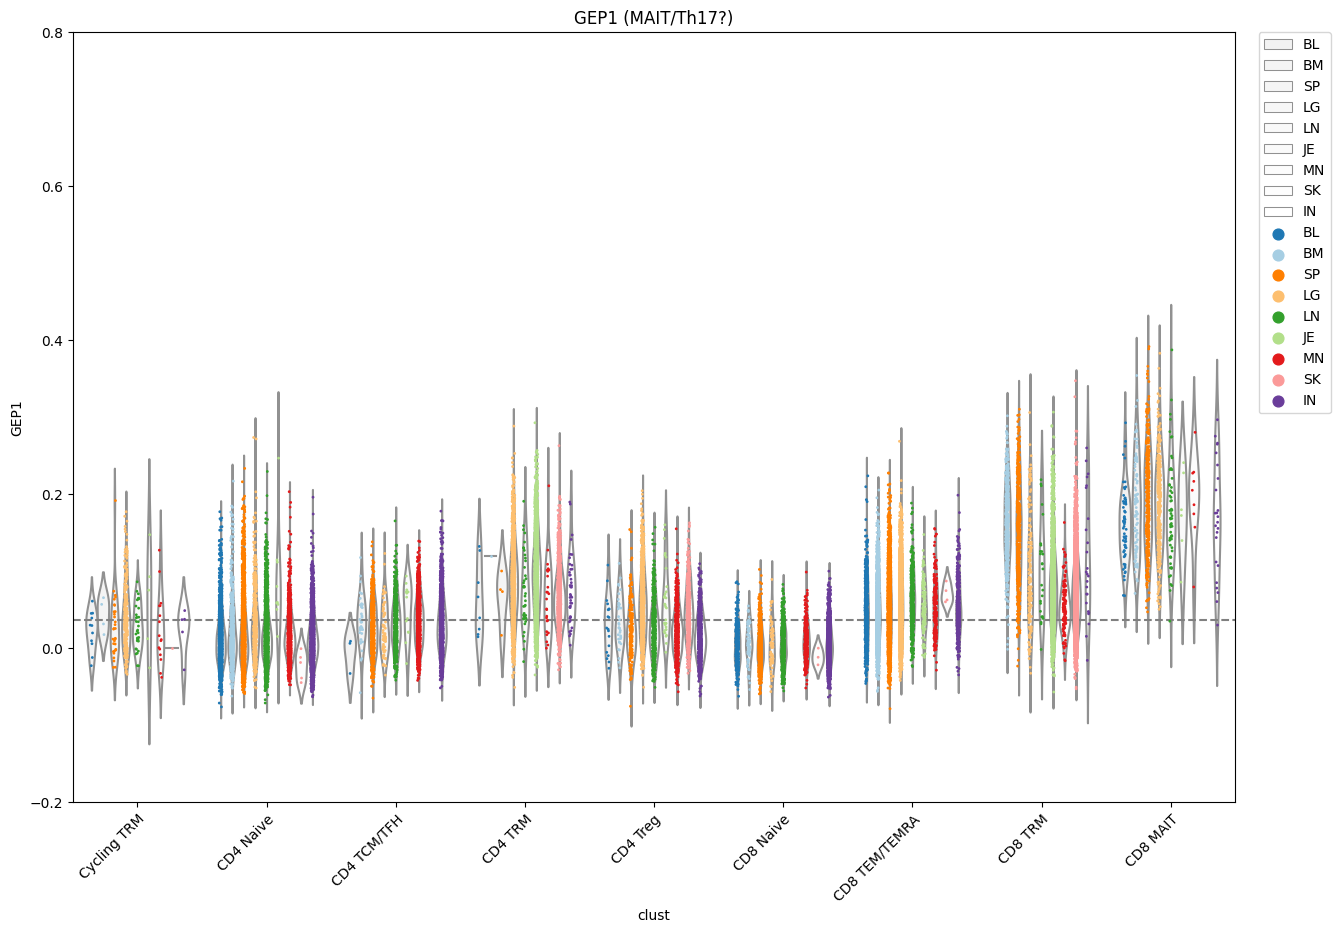

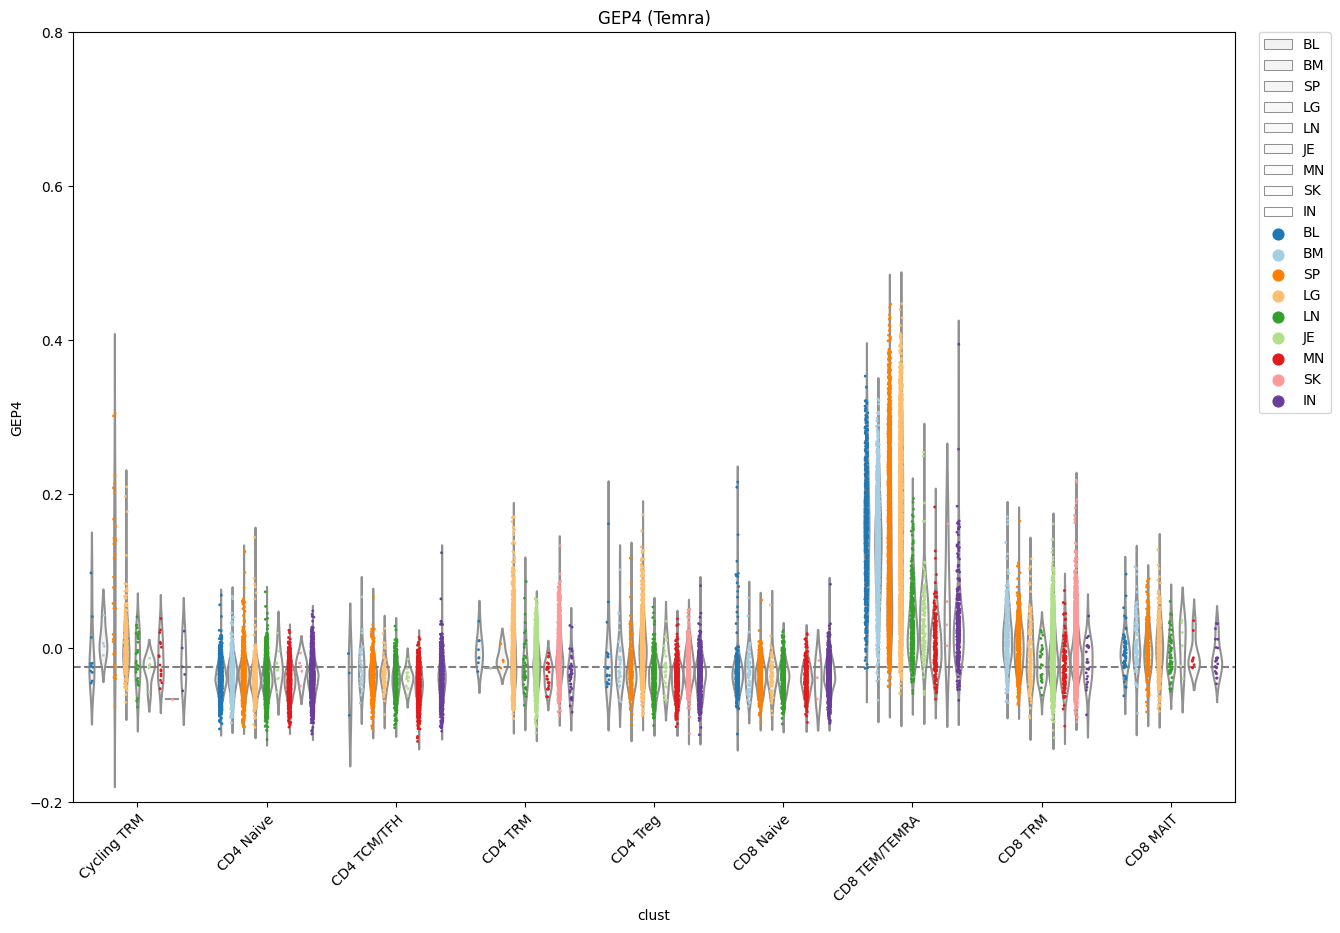

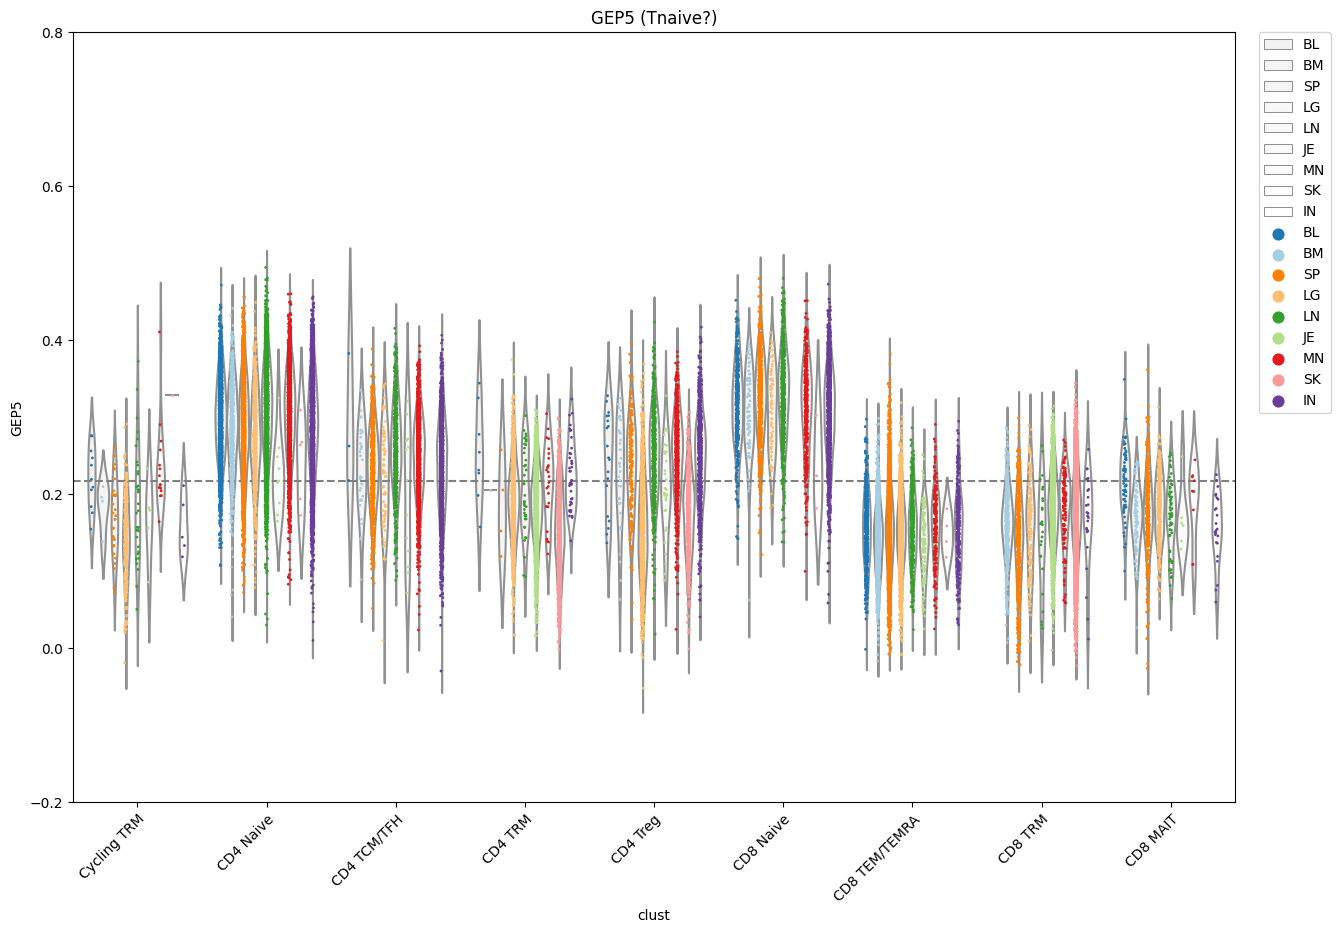

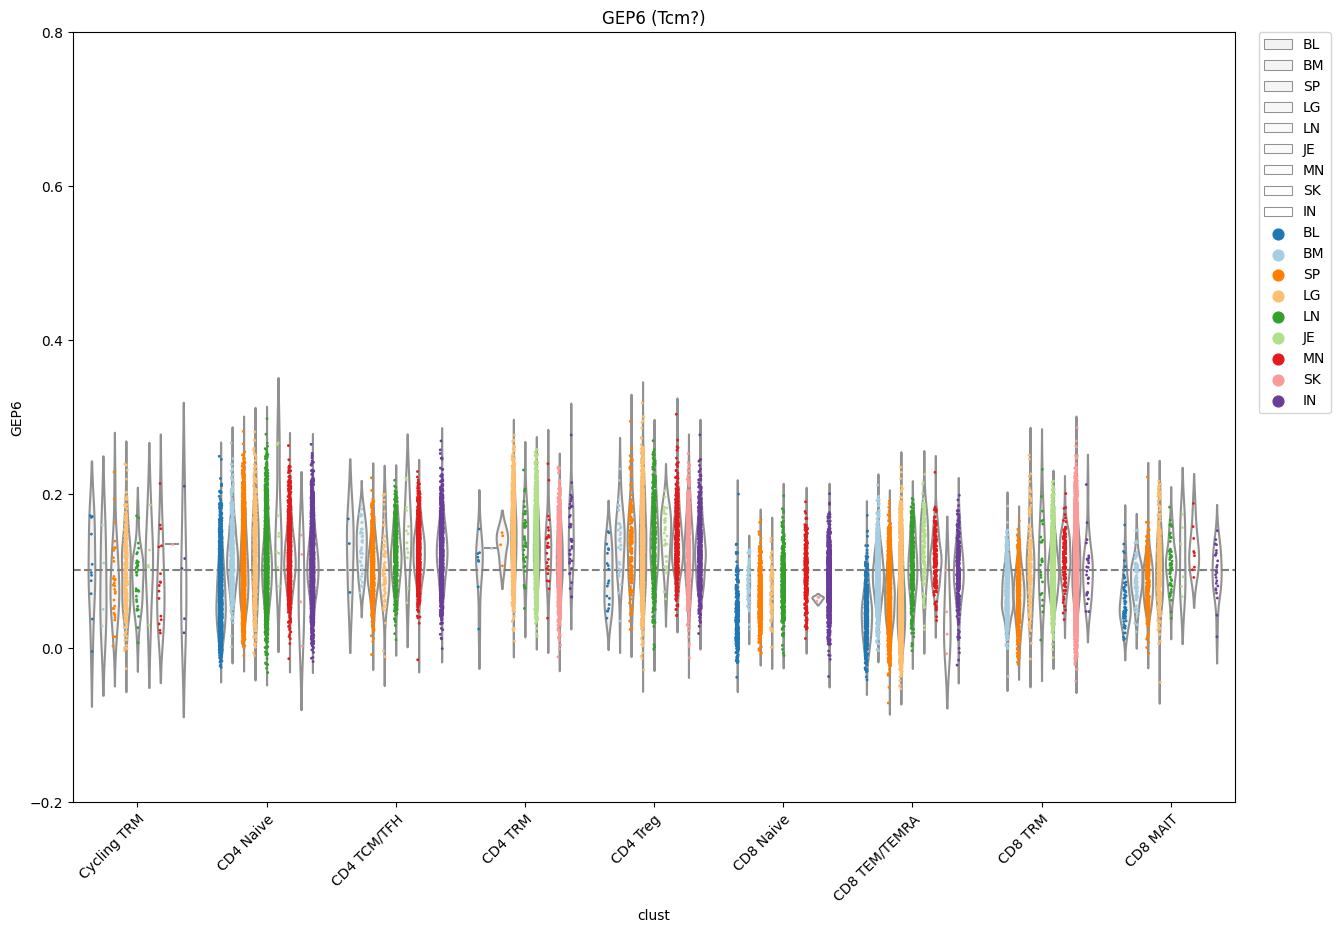

In [149]:
# Color palette
mypal = {
    "BL":"#1f78b4",
    "BM": "#a6cee3",
    "SP": "#ff7f00",
    "LG": "#fdbf6f",
    "LN": "#33a02c",
    "JE": "#b2df8a",
    "MN": "#e31a1c",
    "SK": "#fb9a99",
    "IN": "#6a3d9a"}

# Function to plot GEPs
def plot_vln(gep, title):
    plt.figure(figsize=(15,10))
    plt.axhline(y=np.median(poon_data.obs[gep]), linestyle="--", color="grey")
    ax=sns.violinplot(data=poon_data.obs, x="clust", y=gep, hue="tissue", color="white", inner=None)
    sns.stripplot(data=poon_data.obs, x="clust", y=gep, jitter=True, dodge=True, hue="tissue", palette=mypal, size=2)
    plt.ylim(-0.2, 0.8)
    plt.title(title)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right", rotation_mode='anchor')
    plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", borderaxespad=0)
    # Save figure
    filename="/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_cNMF_" + gep.lower() + "_vlnplot.jpeg"
    plt.savefig(fname=filename, dpi=300)

# Run!
plot_vln(gep="GEP1", title="GEP1 (MAIT/Th17?)")
plot_vln(gep="GEP4", title="GEP4 (Temra)")
plot_vln(gep="GEP5", title="GEP5 (Tnaive?)")
plot_vln(gep="GEP6", title="GEP6 (Tcm?)")

### 2.4.2. UMAPs

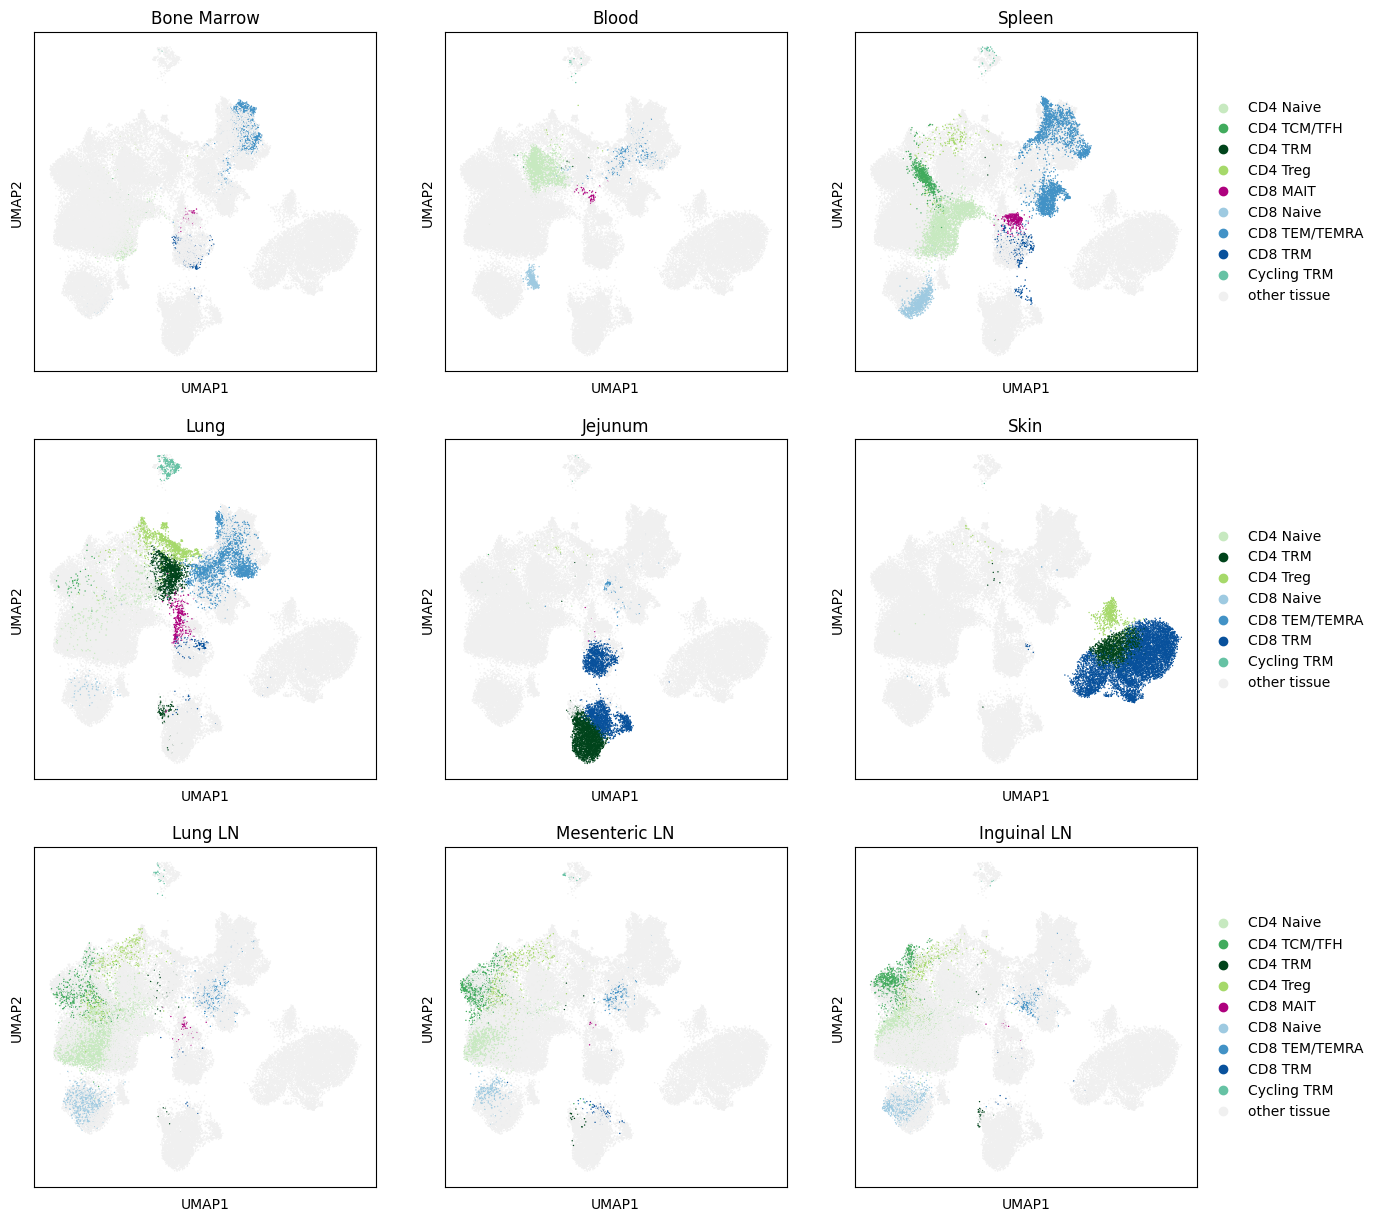

In [304]:
cols_tissue = {
    "CD4 Naive":"#c7e9c0",
    "CD4 TCM/TFH": "#41ab5d",
    "CD4 TRM": "#00441b",
    "CD4 Treg": "#a6d96a",
    "CD8 MAIT": "#ae017e",
    "CD8 Naive": "#9ecae1",
    "CD8 TEM/TEMRA": "#4292c6",
    "CD8 TRM": "#08519c",
    "Cycling TRM": "#66c2a4",
    "other tissue": "#f0f0f0"}

# Clusters by tissue site
tissues = {
    "BM" : "Bone Marrow",
    "BL" : "Blood",
    "SP" : "Spleen",
    "LG" : "Lung",
    "JE" : "Jejunum",
    "SK" : "Skin",
    "LN" : "Lung LN",
    "MN" : "Mesenteric LN",
    "IN" : "Inguinal LN"
}

# Combine subplots
i=0
j=0
fig, axs = plt.subplots(3,3, figsize=(15,15))

for key in tissues.keys():
    # Create new column
    column_name = "clust_"+key
    poon_data.obs[column_name] = np.where(poon_data.obs["tissue"] == key, poon_data.obs["clust"], "other tissue")
    # Plot
    if j<2:
        axs[i,j] = sc.pl.umap(poon_data, color=[column_name], palette=cols_tissue, size=4, title=tissues[key], legend_loc=None, ax=axs[i,j], show=False)
    elif j==2:
        axs[i,j] = sc.pl.umap(poon_data, color=[column_name], palette=cols_tissue, size=4, title=tissues[key], ax=axs[i,j], show=False)
    # Increment
    j=j+1
    if j==3:
        j=0
        i=i+1

# plt.savefig("/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_umap_by_tissue.jpeg", dpi=300)

<Figure size 1300x500 with 0 Axes>

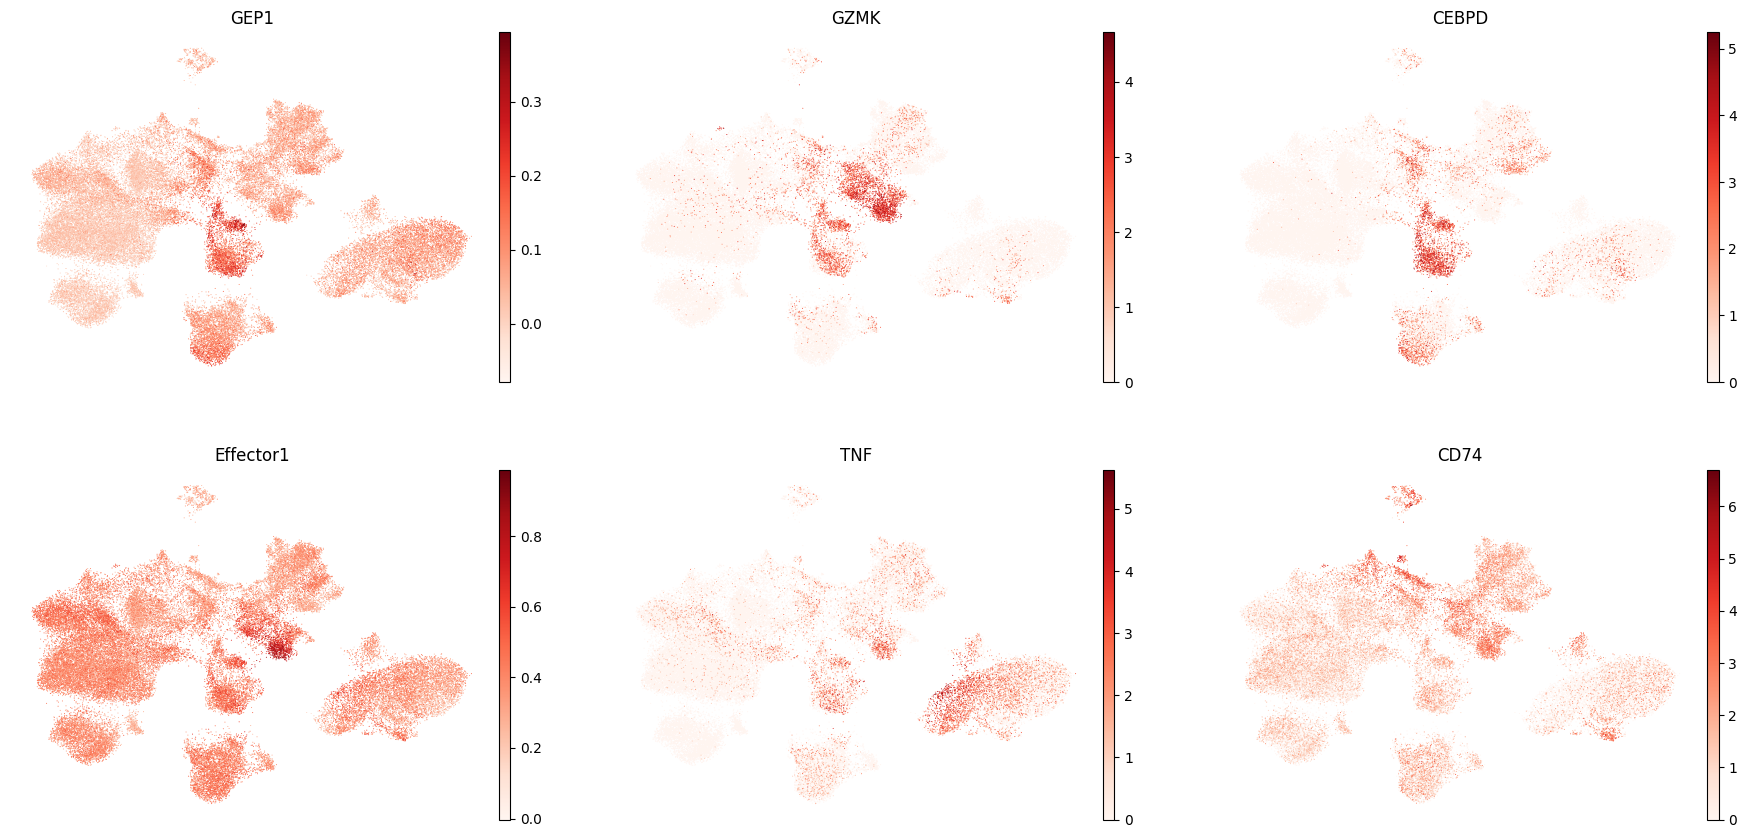

In [311]:
# Effector1 GZMK signature
fig = plt.figure(figsize=(13,5))
sc.pl.umap(poon_data, color=["GEP1", "GZMK", "CEBPD", "Effector1", "TNF", "CD74"], color_map=mpl.cm.Reds, ncols=3, frameon=False, show=False) #, save="poon_umap_gep1"
plt.savefig("/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_umap_effector1.jpeg", dpi=300)

<Figure size 1300x500 with 0 Axes>

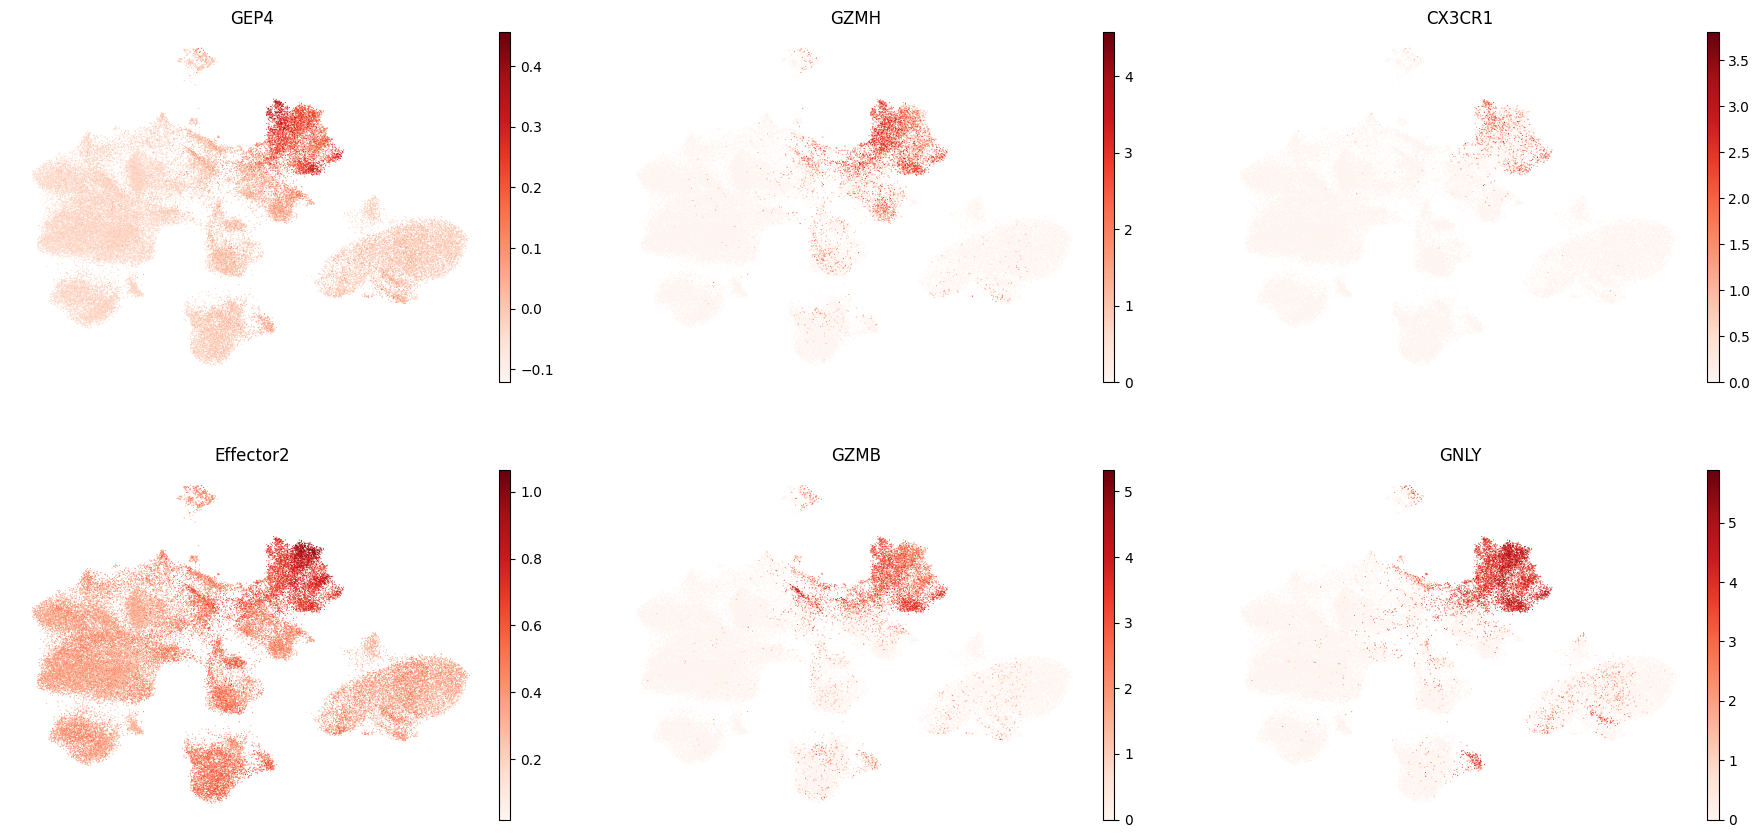

In [313]:
# Effector 2 (GZMB) signature
fig = plt.figure(figsize=(13,5))
sc.pl.umap(poon_data, color=["GEP4", "GZMH", "CX3CR1","Effector2", "GZMB", "GNLY"], color_map=mpl.cm.Reds, ncols=3, frameon=False, show=False) #, save="poon_umap_gep1"
plt.savefig("/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_umap_effector2.jpeg", dpi=300)

<Figure size 1300x500 with 0 Axes>

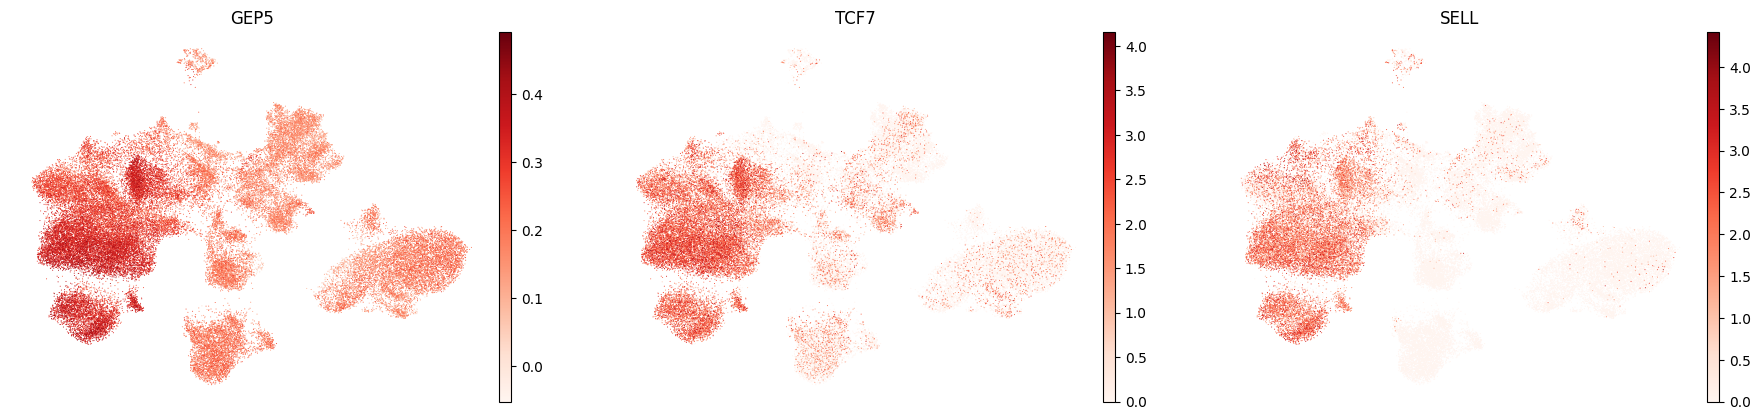

In [314]:
# Naïve
# sc.pl.umap(poon_data, color=["clust","GEP5", "TCF7", "SELL"], color_map=mpl.cm.Reds) #, save="poon_umap_gep4"
fig = plt.figure(figsize=(13,5))
sc.pl.umap(poon_data, color=["GEP5", "TCF7", "SELL"], color_map=mpl.cm.Reds, ncols=3, frameon=False, show=False) #, save="poon_umap_gep1"
plt.savefig("/Users/scarcy/Projects/HumanThymusProject/data/human-thymus/HumanData_17_GEPsOnPoonData/poon_umap_naive.jpeg", dpi=300)